# Lab 1: Numerical Derivatives
## 1. Welcome back to python!
### 1.1.

```python
CREATE variable with list of step sizes (h)
CREATE variables for interval [a,b]
CREATE function f(x)
FIND numerical solution to f'(x) using FOR LOOP
    FOR each item (i) in step size list (h)
            CREATE variable x with step size = current item (i)
            CREATE variable of f(x) using x as input in the f(x) function
            CREATE variable of zeros to later put numerical solution to f'(x) points
            FOR index (k) in length of zeros
                FIND numerical solution to f'(x) for each point 
            CREATE variable for absolute error of f'(x) for each point
            PLOT error vs x on log graph
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

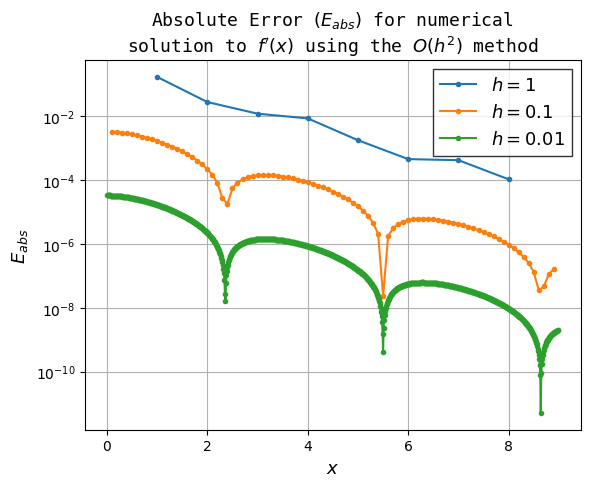

In [2]:
# create list of step sizes (h)
h = [1, 0.1, .01]
a,b = [0,9] # create interval [a,b]

def f(x):
    # returns function f(x)
    return np.exp(-x) * np.sin(x)

# create for loop to find numerical solution to f'(x)
for i in h:
    # loops through each step size (h)
    x = np.arange(a, b+i, i) # create x points with intervals of h
    g = f(x) # create corresponding f(x)
    fn = np.zeros(len(x)) # to later put f'(x) found using O(h^2)

    for k in range(1, len(x)-1):
        # loops through each data point in index [1:-1]
        fn[k] = (g[k+1] - g[k-1]) / (2*i) # O(h^2) equation

    # find analytical solution to f'(x) in [a,b] for each f'(x) point
    fa = np.cos(x) * np.exp(-x) - np.sin(x) * np.exp(-x)
    # find error for approximation to each f'(x) point
    err = abs(fn - fa)

    plt.semilogy(x[1:-1], err[1:-1], '.-', label='$h=${}'.format(np.round(i,2)))

font = {'family':'monospace', 'color':'black', 'size':13}
plt.xlabel('$x$', fontsize=13, fontdict=font)
plt.ylabel('$E_{abs}$', fontsize=13, fontdict=font)
plt.title("Absolute Error $(E_{abs})$ for numerical \nsolution to $f'(x)$ using the $O(h^2)$ method", fontdict=font)
plt.legend(fontsize=13, fancybox=False, edgecolor='k')
plt.grid()

__Why is this error bumpy?__

Above is an abs-log plot of the absolute error $E_{abs}$. We assume that $E_{abs}$ is composed only of the truncation error $E_{trunc}$ for now. We can ignore rounding error $E_{round}$ because $E_{trunc}$ is the most dominant error source at this scale, where $h$ is rather large, although we'll start to see the rounding error more distinctively in a later question.

Let's obtain the expression for the function $E_{abs}$.

The approximation is of the form where $\xi$ is some value of $x$ that lies between $[x+h, x-h]$.

$$
f'(x) = \frac{f(x+h) - f(x-h)}{2h} - \frac{h^2}{6} f^{(3)}(\xi)
$$

where the error term is of the form

$$
E_{abs} = \frac{h^2}{6}f^{(3)}(\xi)
$$

The function to be differentiated is $f(x)=e^{-x}sin(x)$ so in the error term we have $f^{(3)}(x)=2e^{-x} (sin(x) + cos(x))$.

$$
E_{abs} = \frac{h^2}{6} 2e^{-x} (sin(x) + cos(x))
$$

When we do a linear plot of the equation for $E_{abs}$ we find that the function has roots, which correspond to the same location $x$ as the dips in the abs-log plot of the error. The depths of the dips depend on how close we can get to the location of these roots at $x$, which will be determined by the sample density ($h$) The smaller the step size $h$, the closer we can get to these roots, and therefore the closer we get to the minima of the function for the error term i.e. the lower the dips.

It is important to note that we can never actually get an absolute error of zero, at the relatively large step sizes used here the main limiting factor to reaching zero will be due to the error contributions from the sample density, but at smaller step sizes of around $h \approx 10^{-5}$ we can start to consider other error contributions, which are as small as $10^{-13}$ and cannot be observed in the scale of the graphs above.

### 1.2.

```python
FIND f'(x) and absolute error for every f'(x) point
    CREATE variable for a step size (h)
        CREATE variable x with step size h
        CREATE variable f(x) with x as input in f(x) function
        FIND analytical solution to f'(x) with x as input
        FIND numerical solution to f'(x) via indexing
        FIND absolute error

(this particular index method only works for one step size (h) at a time)
```

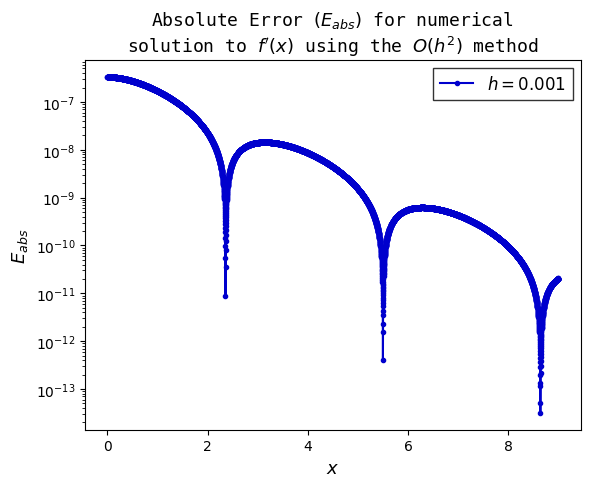

In [5]:
h = 0.001 # step size (h)
x = np.arange(a, b, h)
g = f(x) # function f(x)

# find solutions to f'(x)
fn = (g[2:] - g[:-2]) / (2*h) # numerical solution
fa = np.cos(x) * np.exp(-x) - np.sin(x) * np.exp(-x) # analytical solution
err = np.abs(fa[1:-1] - fn)

# format graph
plt.semilogy(x[1:-1], err, '.-', label='$h=${}'.format(np.round(h,5)), color='mediumblue')
plt.xlabel('$x$', fontsize=13, fontdict=font)
plt.ylabel('$E_{abs}$', fontsize=13, fontdict=font)
plt.title("Absolute Error $(E_{abs})$ for numerical \nsolution to $f'(x)$ using the $O(h^2)$ method", fontdict=font)
plt.legend(loc='best', fancybox=False, edgecolor='k', fontsize=12)

In [3]:
h = 0.0001
x = np.arange(a, b, h)
g = f(x)
fa = np.cos(x) * np.exp(-x) - np.sin(x) * np.exp(-x)

# method 1: for loop
t = time.time()

f1 = np.zeros(len(x))
for i in range(1, len(f1)-1):
    f1[i] = (g[i+1] - g[i-1]) / (2*h)

t1 = time.time() - t


# method 2: index
t = time.time()

f2 = np.zeros(len(x))
f2[1:-1] = (g[2:] - g[:-2]) / (2*h)

t2 = time.time() - t

print('step size (h) : {}'.format(h))
print('indexing time : {}'.format(t2))
print('for loop time : {}'.format(t1))

# if time = 0.0 s pick a smaller step size (h) or increase interval [a,b]
# sometimes process is so quick time will round to 0.0 s

step size (h) : 0.0001
indexing time : 0.0020389556884765625
for loop time : 0.05931901931762695


## 2. non-central differences

### 2.1.

Find the truncation error $E_{trunc}$ of the non-central first order method.

$$
f^{(1)}(x) \approx \frac{f(x+h) - f(x)}{h}
$$

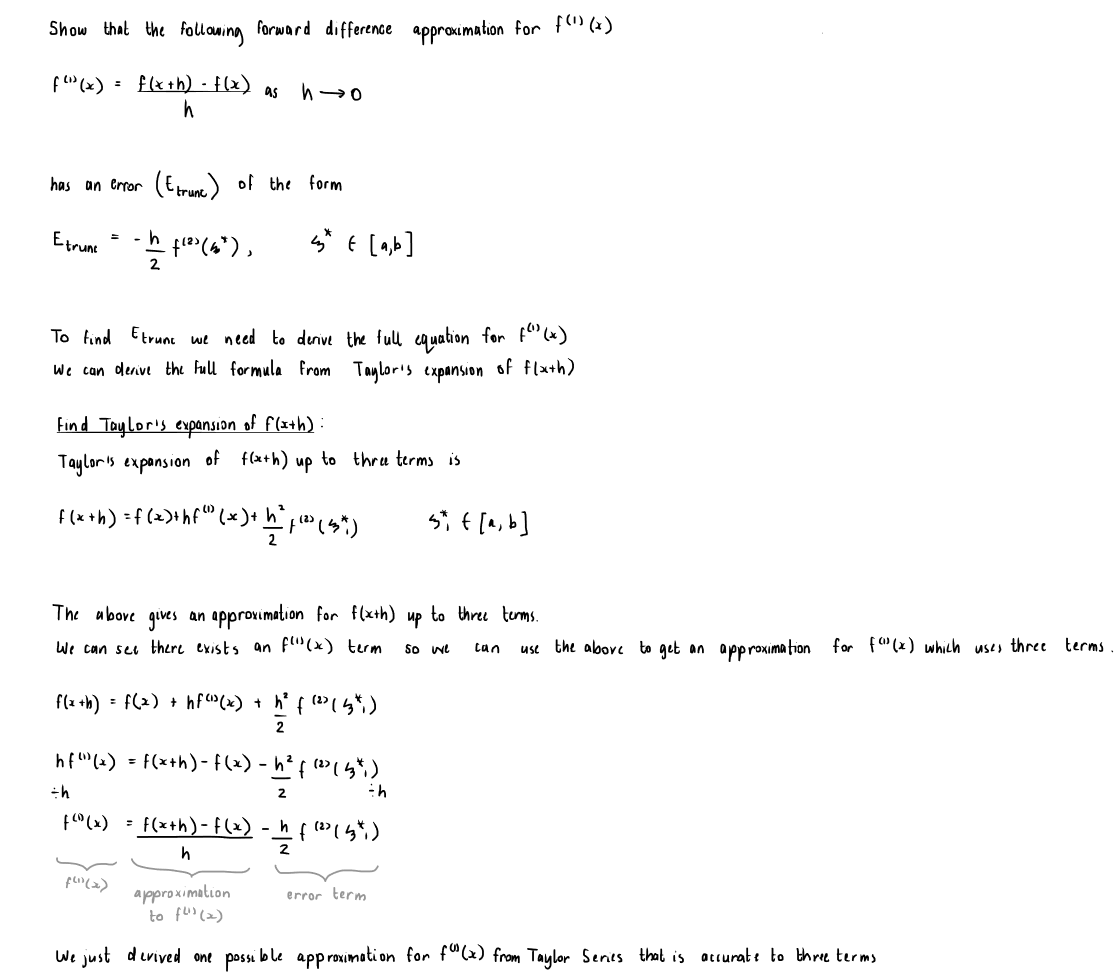

Simply just expand $f(x+h)$ in Taylor Series and rearrange.

__What are the advantages and disadvantages of this approximation method?__

An advantage is that it can find the differential of the first point which the $O(h^2)$ method omits.
A disadvantage is that the error is dependant on $h$ instead of $h^2$ so this method has a bigger error (see next question).

### 2.2.
### 2.3.
_(2.2. and 2.3. in the same cell)_

```python
USE forward difference numerical approximation for f'(x)
    CREATE variable for step size (h)
    CREATE variable x with intervals of (h)
    CREATE variable f(x) with x as input
    CREATE variable for numerical solution to f'(x)
        INPUT f(x) into variable
    CREATE variable for analytical solution to f'(x)

USE central difference numerical approximation for f'(x)
    CREATE variable for numerical solution to f'(x)
        INPUT f(x) into variable

PLOT forward & central difference solutions to f'(x)
PLOT analytical solution to f'(x)

SELECT arbitrary point (x0) to find errors of for different (h)
    CREATE range of step sizes (h)
    CREATE variable for analytical solution to f'(x0)
    CREATE variable for numerical solution(s) to f'(x0)
    CREATE variable for absolute error of each numerical solution
    PLOT absolute error vs h
```

Text(0.5, 1.0, 'Absolute Error $E_{abs}$ vs $h$')

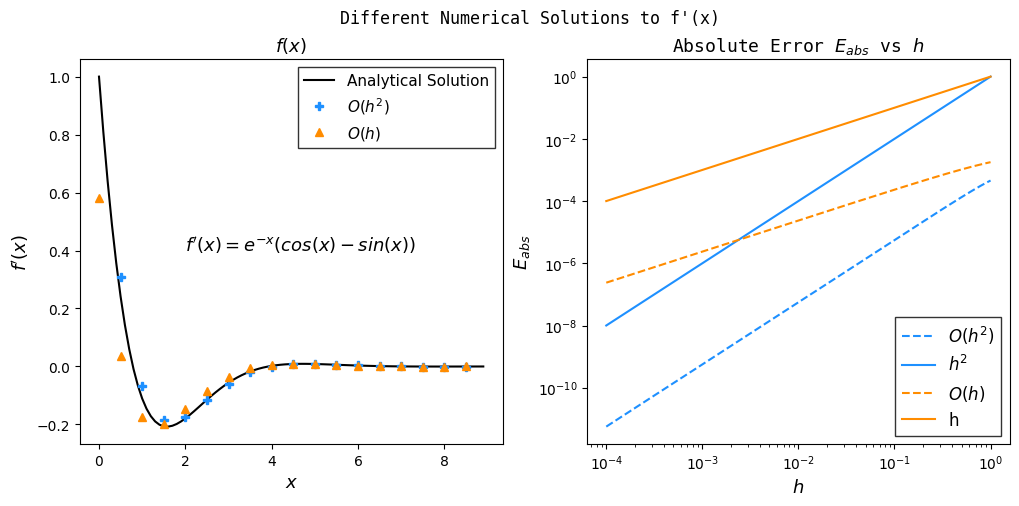

In [9]:
h = 0.5 # step size (h)

x = np.arange(0, 9+h, h) # x for numerical solution
xa = np.arange(0, 9, 0.1) # x for analytical solution

g = f(x)

# find solutions to f'(x)
f1 = (g[2::] - g[:-2]) / (2 * h) # central difference
f2 = (g[1:] - g[:-1]) / h # forward difference

f0 = np.cos(x) * np.exp(-x) - np.sin(x) * np.exp(-x) # analytical
fa = np.cos(xa) * np.exp(-xa) - np.sin(xa) * np.exp(-xa)

# find absolute error
err1 = np.abs(f0[1:-1] - f1) # central difference
err1 = np.abs(f0[:-1] - f2) # forward difference

fig, axs = plt.subplots(1,2, figsize=(12,5))

# plot graph
axs[0].plot(xa, fa, label='Analytical Solution', color='k')
axs[0].plot(x[1:-1], f1, 'P', label='$O(h^2)$', color='dodgerblue')
axs[0].plot(x[:-1], f2, '^', label="$O(h)$", color='darkorange')

plt.suptitle("Different Numerical Solutions to f'(x)", fontdict=font)
axs[0].legend(loc='best', fancybox=False, edgecolor='k', fontsize=11)
axs[0].set_xlabel('$x$', fontdict=font); axs[0].set_ylabel("$f'(x)$", fontdict=font);
axs[0].text(2, .4, "$f'(x)=e^{-x} (cos(x)-sin(x))$", fontdict=font)
axs[0].set_title('$f(x)$', fontdict=font)


# compare error for a single point (x)
h = np.arange(1e-4, 1, 1e-5)
x0 = 6

# find analytical solution
fa = np.cos(x0) * np.exp(-x0) - np.sin(x0) * np.exp(-x0)

# find central difference
g = (f(x0+h) - f(x0-h)) / (2*h)
err1 = np.abs(fa-g) # error for solution

# find forward difference
g = (f(x0+h) - f(x0)) / h
err2 = np.abs(fa-g) # error for solution

# plot graphs
axs[1].loglog(h, err1, '--', label='$O(h^2)$', color='dodgerblue') # central difference
axs[1].loglog(h, h**2, label='$h^2$', color='dodgerblue')

axs[1].loglog(h, err2, '--', label='$O(h)$', color='darkorange') # forward difference
axs[1].loglog(h, h, label='h', color='darkorange')

axs[1].legend(loc='best', fontsize=12, edgecolor='k', fancybox=False)
axs[1].set_xlabel('$h$', fontdict=font); axs[1].set_ylabel('$E_{abs}$', fontdict=font)
axs[1].tick_params(axis='y', which='minor', left=False)
axs[1].set_title("Absolute Error $E_{abs}$ vs $h$", fontdict=font)

### 3.1.

Find the truncation error $E_{trunc}$ for the following first order method

$$
f^{(1)}(x) = \frac{-f(x+2h) + 8f(x+h) - 8f(x-h) + f(x-2h)}{12h} + E_{trunc}
$$

We consider $E_{trunc}$ as the only source of error in this approximation.



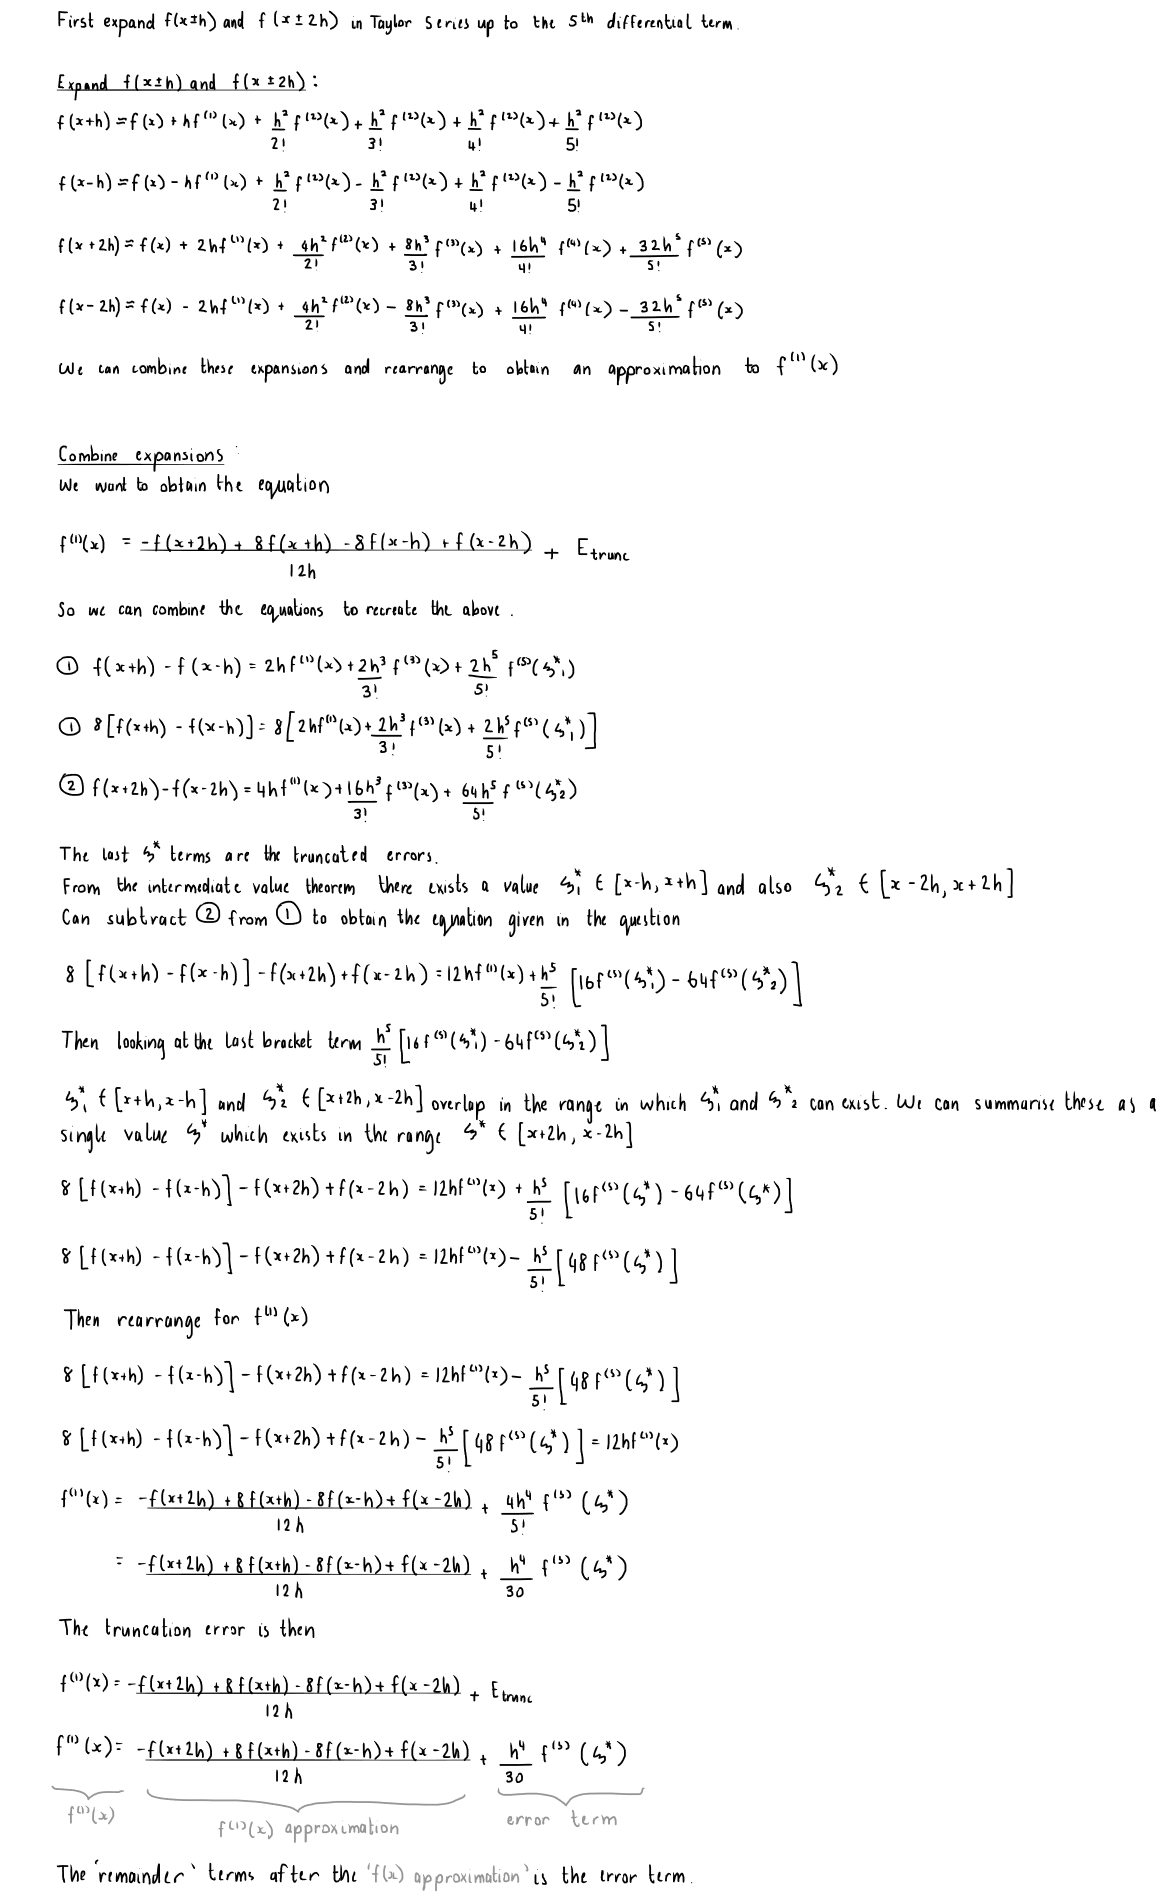

### 3.2.

```python
ADD new numerical differentiation algorithm
    CREATE variable for single point (x)
    CREATE variable for range of step sizes (h)
    CREATE variables for numerical solution to f'(x)
        INPUT f(x0) for the one point into each variable
    CREATE variable for analytical solution to f'(x)
    CREATE variable for absolute error of numerical solution
    PLOT absolute error vs h

(Use the same x and h as before)
```

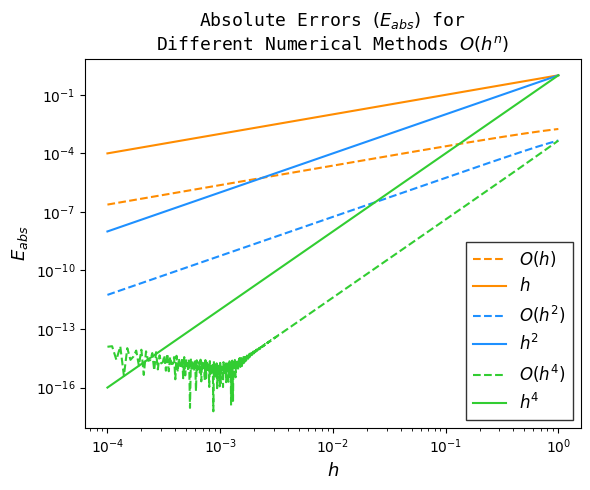

In [10]:
# find solution to f'(x)
g = (-f(x0+2*h) + (8*f(x0+h)) - (8*f(x0-h)) + f(x0-(2*h))) / (12*h) # five-point central difference

# find absolute error
err3 = np.abs(fa-g)

# plot graphs
plt.loglog(h, err2, '--', label='$O(h)$', color='darkorange') # forward difference
plt.loglog(h, h, label="$h$", color='darkorange')

plt.loglog(h, err1, '--', label='$O(h^2)$', color='dodgerblue') # three-point central difference
plt.loglog(h, h**2, label="$h^2$", color='dodgerblue')

plt.loglog(h, err3, '--', label='$O(h^4)$', color='limegreen') # five-point central difference
plt.loglog(h, h**4, label="$h^4$", color='limegreen')

plt.title("Absolute Errors $(E_{abs})$ for \nDifferent Numerical Methods $O(h^n)$", fontdict=font)
plt.ylabel('$E_{abs}$', fontdict=font); plt.xlabel("$h$", fontdict=font)
plt.legend(loc='lower right', fancybox=False, edgecolor='k', fontsize=12)
plt.tick_params(axis='y', which='minor', left=False)

__What is the squiggly line?__

The squiggly line in $O(h^4)$ is due to the round-off error. In 'week_1.ipynyb' we demonstrated that's there's a region of $h$ for which the rounding error is the most dominant and a region where the truncation error is the most dominant, we can see this clear distinction again in the graph above. If we include even smaller values of $h$ in our `h` range we'll start to see these squiggles in the other $O(h^n)$ methods too.

__What is the reason for the rounding error?__

The computer cannot represent all real numbers perfectly, it has a limited precision when performing calculations involving finite differences. There will be a small error between the number you want and the number that will instead be stored in the computer's memory.

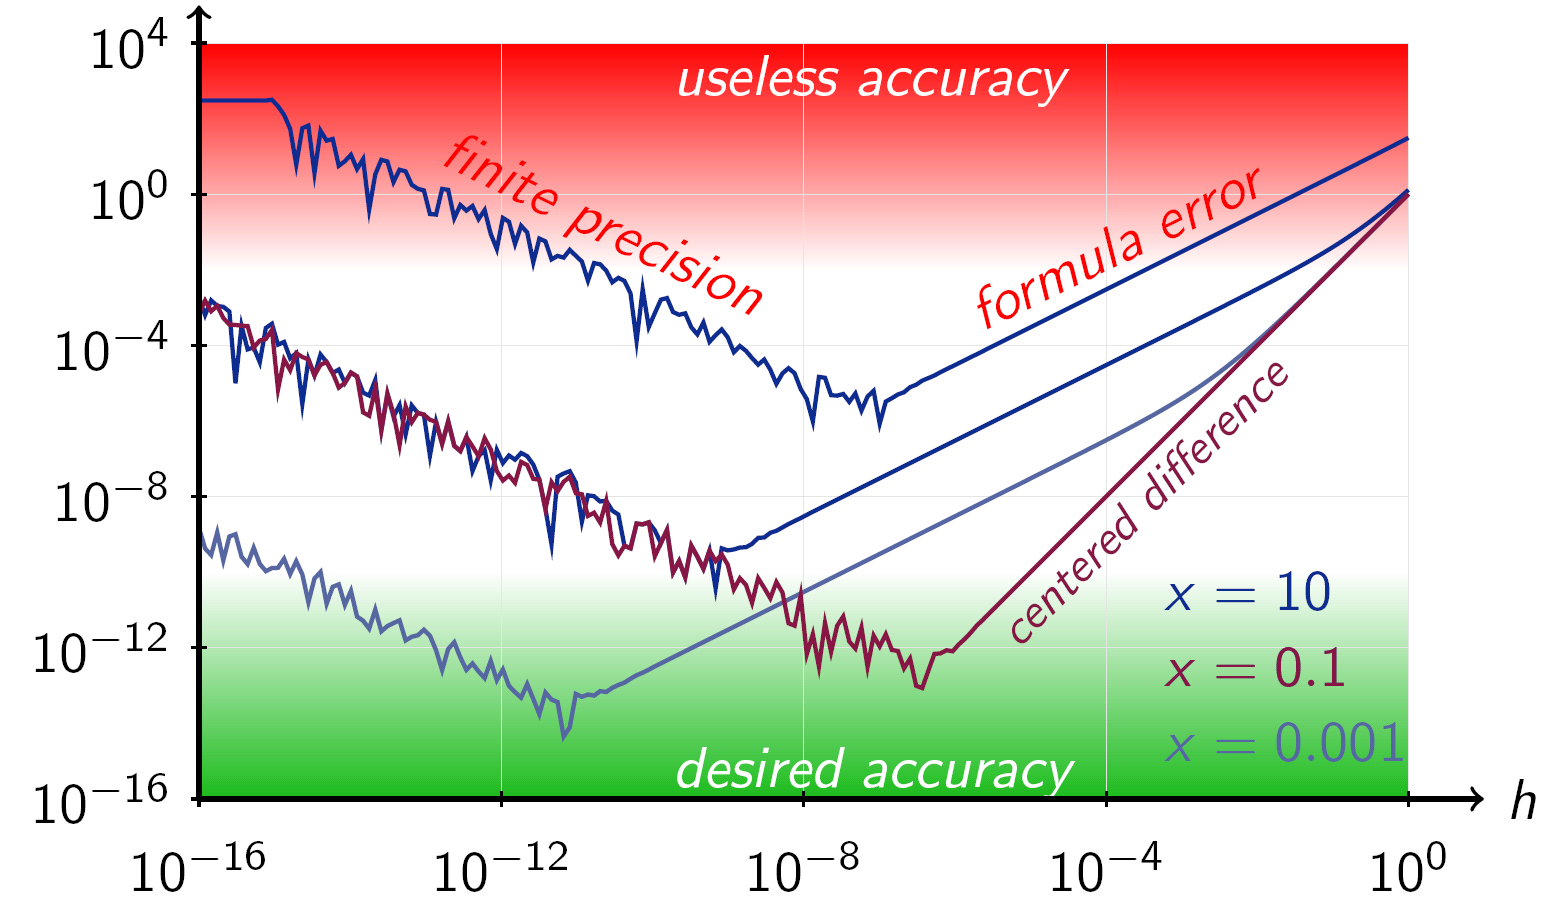
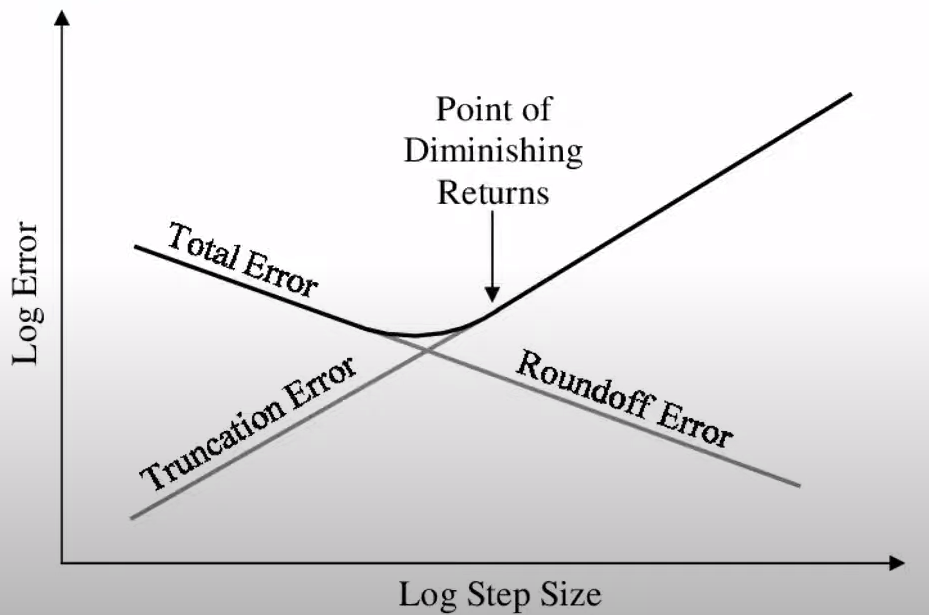

### 3.3.

We want to print solutions up to 4 decimal places, but we don't know what value of $h$ to use to get these solutions.

For the equation in the question the total error $E_{tot}$ is of the following.

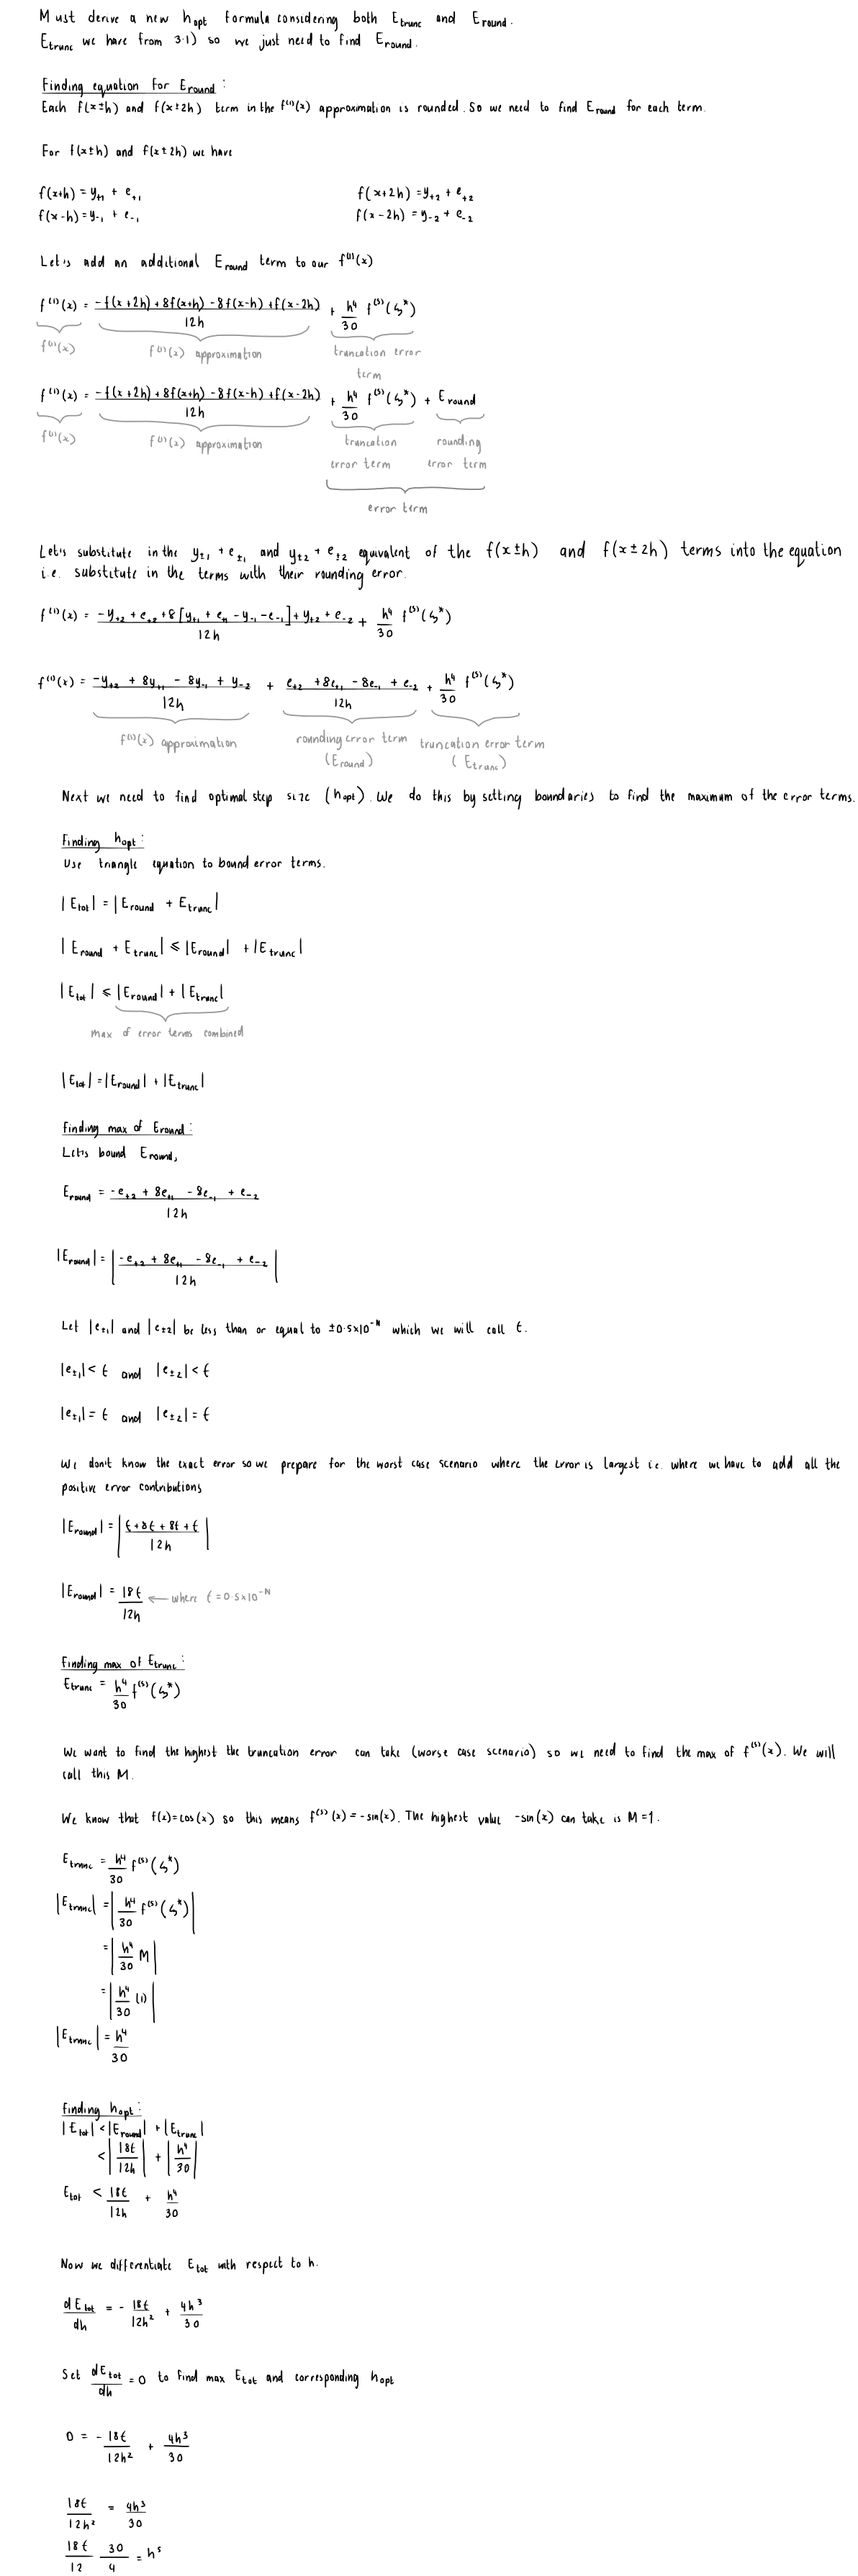
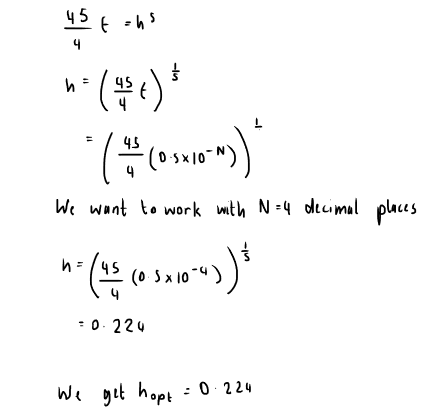

## 4.
### 4.1.
We can  verify a numerical method has a truncation error of the form $O(h^2)$ by seeing if it is proportional to $h^2$ on the log-log scale.

```python
VERIFY the numerical method is of the form O(h^2)
    CREATE function for numerical method to find f''(x)
    CREATE variable for range of step sizes (h)
    CREATE variable for single data point (x)
    CREATE variable for numerical method solutions
        INPUT single sample point x and +/- h into function
    CREATE variable for absolute error of numerical method
    PLOT absolute error vs h
```

We can see how the given method fits the analytical solution to guage whether it's a valid approximation


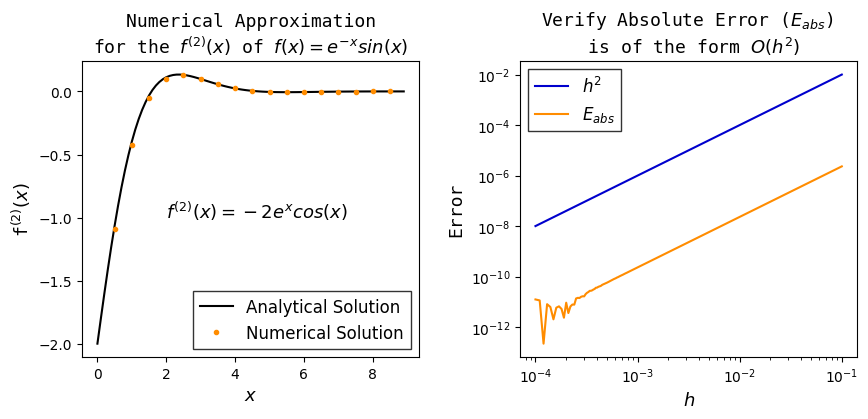

In [67]:
# create function to find for f''(x)
def num_dif2_Oh2(f):
    return (f[2::] + f[0:-2] - 2 * f[1:-1]) / h**2

# create parameters
h = 0.5 # step size (h)
x_n = np.arange(0,9+h,h) # for numerical solution
x_a = np.arange(0,9,0.1) # for analytical solution

h_ra = np.arange(1e-4,1e-1,1e-5) # step size range (h)
x0 = 6 # test sample point

# find solution(s) to f''(x)
g_x = -2 * np.exp(-x_a) * np.cos(x_a) # analytical solution (continuous plot)
k_x = -2 * np.exp(-x_n) * np.cos(x_n) # analytical solution (discrete plot)
h_x = num_dif2_Oh2(f(x_n)) # numerical solution

# find absolute error
err = np.abs(k_x[1:-1]-h_x)

# find solution(s) to f''((x0)
j_x = -2 * np.exp(-x0) * np.cos(x0) # analytical solution
l_x = (f(x0+h_ra) + f(x0-h_ra) - 2 * f(x0)) / h_ra**2 # numerical solution

# find absolute error
err_ra = np.abs(j_x-l_x)

# format graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.subplots_adjust(wspace=.3, top=.85)

# plot numerical solutions 
ax1.plot(x_a, g_x, label='Analytical Solution', color='k')
ax1.plot(x_n[1:-1], h_x, '.', markersize=6, label="Numerical Solution", color='darkorange')

# format graph
ax1.set_xlabel('$x$', fontdict=font)
ax1.set_ylabel('f$^{(2)}(x)$', fontdict=font)
ax1.legend(loc='best', fancybox=False, edgecolor='k', fontsize=12)
ax1.set_title('Numerical Approximation'
              '\nfor the $f^{(2)}(x)$ of $f(x)=e^{-x} sin(x)$', 
              fontdict=font)
ax1.text(2, -1, r'$f^{(2)}(x)=-2 e^{x} cos(x)$', fontdict=font)

# plot absolute error
ax2.loglog(h_ra, h_ra**2, label='$h^2$', color='mediumblue')
ax2.loglog(h_ra, err_ra, label='$E_{abs}$', color='darkorange')

# format graph
ax2.set_xlabel('$h$', fontdict=font)
ax2.set_ylabel('Error', fontdict=font)
ax2.legend(loc='best', fancybox=False, edgecolor='k', fontsize=12)
ax2.set_title('Verify Absolute Error ($E_{abs}$) \n is of the form $O(h^2)$', fontdict=font)

print("We can see how the given numerical method fits to the analytical solution to guage whether it's a valid approximation")

In the second graph we can see the wiggle again around $h \sim 10^{-4}$ where the finite precision (rounding error) of the computer starts to becomes the most dominant source of error in $E_{abs}$.

### 4.2.
The formula is $\frac{f(x+h) + f(x-h) - 2f(x)}{h^2}$.

### 4.3.
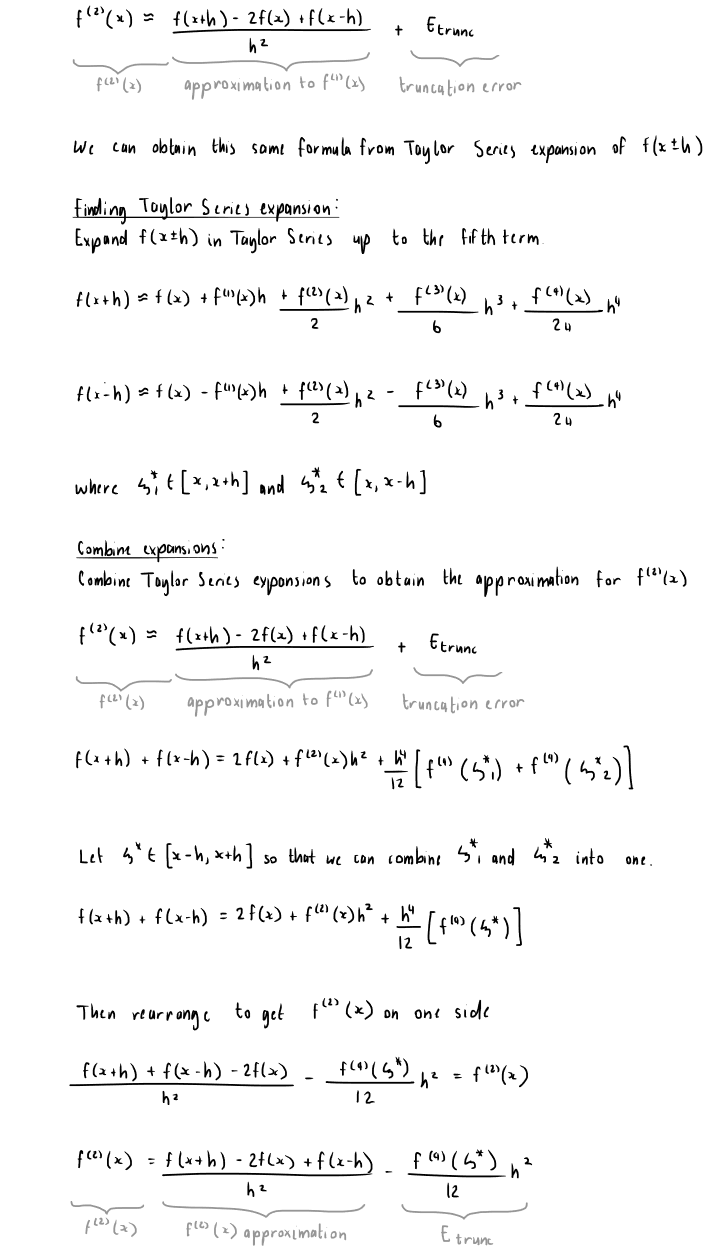